Для решения данной задачи я выбрал алгоритм - дерево решений.  
Так как он довольно простой и легко интерпретируется а так же подходит для небольшого количества данных.  

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [46]:
df = pd.read_csv('table.csv')

### Посмотрим как распределены данные

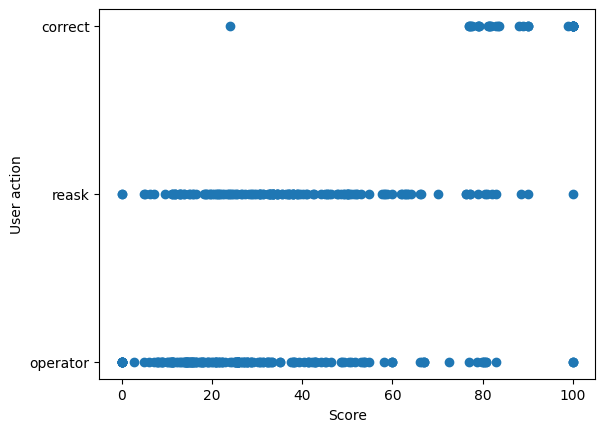

In [47]:
plt.scatter(df['Score'], df['Action']);
plt.xlabel('Score');
plt.ylabel('User action');

##### Подготовим данные.

In [48]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['Action'] = df['Action'].map({'operator': 1, 'reask': 2, 'correct': 3})

y = df['Action']                # ответы пользователей
x = df.drop('Action', axis=1)   # score от бота

#### Разобьем датасет на тренировочну часть и отложенную выборку.

In [49]:
x_train, x_valid, y_train, y_valid = \
    train_test_split(x, y, test_size=0.3, random_state=17)

In [50]:
dtree = DecisionTreeClassifier(random_state=17)
tree_params = {'max_depth': range(1, 5)}
tree_grid = GridSearchCV(dtree, tree_params, cv=5)
tree_grid.fit(x_train, y_train)
tree_grid.best_score_, tree_grid.best_params_

(0.6018853695324283, {'max_depth': 2})

#### Лучшие данные получились при глубине дерева равной 2
Проверим их на отложенной выборке

In [52]:
predicted = tree_grid.predict(x_valid)
tree_result = accuracy_score(y_valid, predicted)
print(f'Результат на отложенной выборке: {tree_result * 100:.2f}')

Результат на отложенной выборке: 68.47


### Точность алгоритма на отложенноый выборке получилась 68%